# Phys555 Assignment 1 Question 3

Q3- Add noise to the MNIST data set (explore the web to find a good example). Compare the explained variance ratio vs. the principle components (plots) and find the best first components so that the added noise is removed/cancelled. Change the amplitude of the noise and have a discussion in the notebook. 

In [139]:
# Import the necessary packages 
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
import skimage
import matplotlib.pyplot as plt

(60000, 784)
(60000, 784)


Text(0.5, 1.0, 'Noisy Image with Variance of 0.01')

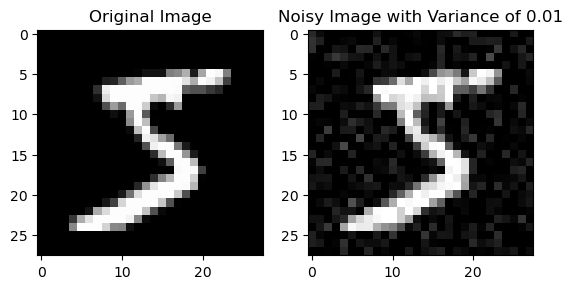

In [192]:
# Load the mnist data
(inp_tr, tar_tr), (inp_va, tar_va) = mnist.load_data()
inp_tr = inp_tr/255.

# Do I need to calculate the mean, etc? 
inp_tr=np.reshape(inp_tr,(-1,28*28))

print(inp_tr.shape)

var = 0.01
noisy_images_tr = skimage.util.random_noise(inp_tr, mode='gaussian', seed=None, clip=True, var=var)
print(noisy_images_tr.shape)

# Look at the first image with noise
plt.subplot(1,2,1)
plt.imshow(inp_tr[0].reshape(28,28),cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(noisy_images_tr[0].reshape(28,28),cmap='gray')
plt.title('Noisy Image with Variance of ' + str(var))

## PCA of Non-Noisy Data

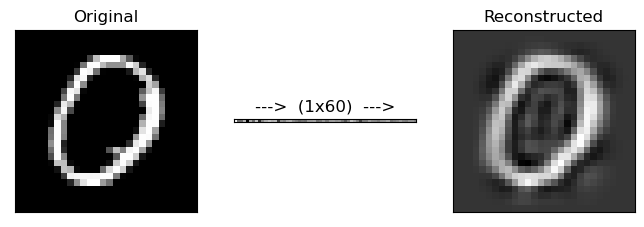

In [193]:
# Not noisy data plots 
n_pic = np.random.choice(np.arange(len(inp_va)))

# going with 250 as a starting point, as it looks to account for approx 90% of the variance of all of the data
# for kc in [20, 50, 200, 250, 300, 400]: 250, 300. and 400 looked very similar
#for kc in [100,150,200,250]:
for kc in [60]:
    n_components=kc
    pca=PCA(n_components=n_components)

    # same thing as fit_transform from q1
    pca.fit(inp_tr)
    inp_tr_pca_orig = pca.transform(inp_tr)
    exp_var_pca_orig = pca.explained_variance_ratio_
    cum_sum_eigenvalues_orig = np.cumsum(exp_var_pca_orig)

    plt.figure(n_pic, figsize=(8,8))
    approximation = pca.inverse_transform(inp_tr_pca_orig[n_pic])
    
    fig = plt.figure(n_pic)
    plt.subplot(1, 3, 1)
    plt.imshow(inp_tr[n_pic].reshape(28,28),cmap='gray')
    plt.title('Original')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 3, 2)
    plt.imshow(inp_tr_pca_orig[n_pic].reshape((-1, n_components)),cmap='gray')
    plt.title('--->  (1x'+str(n_components)+')  --->')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 3, 3)
    plt.imshow(approximation.reshape(28,28),cmap='gray')
    plt.title('Reconstructed')
    plt.xticks([])
    plt.yticks([])
    plt.show()

## PCA of Noisy Data

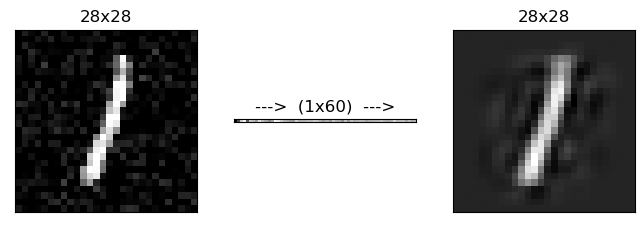

In [194]:
### Noisy data plots
n_pic = np.random.choice(np.arange(len(noisy_images_tr)))

for kc in [60]:
    n_components=kc
    pca=PCA(n_components=n_components)

    # same thing as fit_transform from q1
    pca.fit(noisy_images_tr)
    inp_tr_pca_noisy = pca.transform(noisy_images_tr)
    
    exp_var_pca_noisy = pca.explained_variance_ratio_
    cum_sum_eigenvalues_noisy = np.cumsum(exp_var_pca_noisy)

    plt.figure(n_pic, figsize=(8,8))
    approximation = pca.inverse_transform(inp_tr_pca_noisy[n_pic]) # re-construct the image
    fig = plt.figure(n_pic)
    
    plt.subplot(1, 3, 1)
    plt.imshow(noisy_images_tr[n_pic].reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 3, 2)
    plt.imshow(inp_tr_pca_noisy[n_pic].reshape((-1, n_components)),cmap='gray')
    plt.title('--->  (1x'+str(n_components)+')  --->')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 3, 3)
    plt.imshow(approximation.reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])
    plt.show()

## Variance Plots

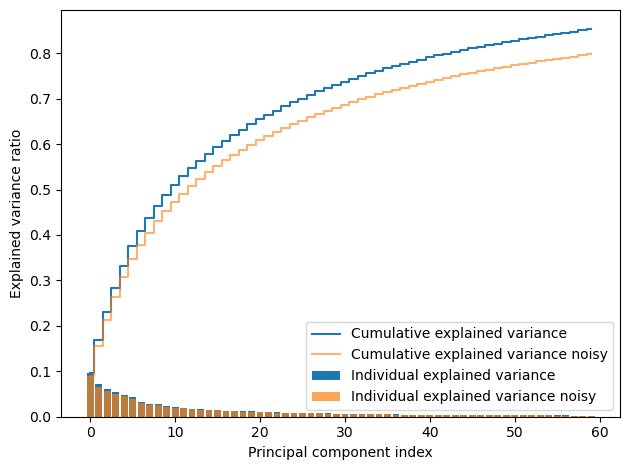

In [195]:
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca_orig)), exp_var_pca_orig, alpha=1, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues_orig)), cum_sum_eigenvalues_orig, where='mid',label='Cumulative explained variance')

plt.bar(range(0,len(exp_var_pca_noisy)), exp_var_pca_noisy, alpha=0.7, align='center', label='Individual explained variance noisy')
plt.step(range(0,len(cum_sum_eigenvalues_noisy)), cum_sum_eigenvalues_noisy, where='mid',label='Cumulative explained variance noisy', alpha=0.6)

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

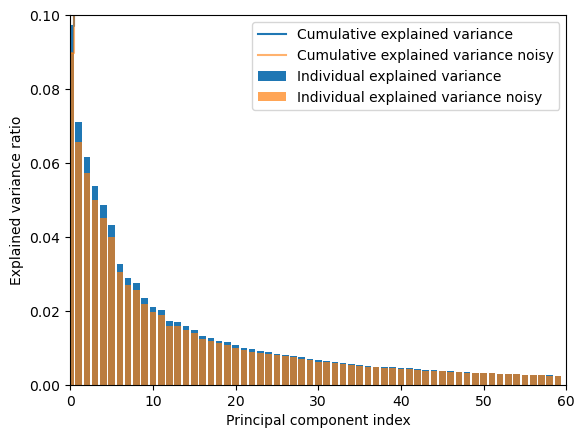

In [196]:
# Create the visualization plot zoomed in 
plt.bar(range(0,len(exp_var_pca_orig)), exp_var_pca_orig, alpha=1, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues_orig)), cum_sum_eigenvalues_orig, where='mid',label='Cumulative explained variance')

plt.bar(range(0,len(exp_var_pca_noisy)), exp_var_pca_noisy, alpha=0.7, align='center', label='Individual explained variance noisy')
plt.step(range(0,len(cum_sum_eigenvalues_noisy)), cum_sum_eigenvalues_noisy, where='mid',label='Cumulative explained variance noisy', alpha=0.6)

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.xlim(0, 60)
plt.ylim(0, 0.1)
plt.show()

So, at approximately principal component 50 the difference between the unnoised data and noisy data is minimal, so after component 50 there is no real influence from the noise. For var 0.08. Looking at where the data stops changing compared to the original data b/c then there's no difference between them. 

For a smaller variance, less principal components are needed. Var 0.02. Maybe approx 30/40. 

## References 

https://scikit-image.org/docs/stable/api/skimage.util.html#random-noise